<a class="anchor" id="0"></a>
# **Rainfall in Australia** 


<img src=https://thumbs.dreamstime.com/b/trees-whatipu-point-huia-bay-auckland-new-zealand-march-two-tall-green-windswept-shoreline-under-heavy-cloudy-sky-91689726.jpg> 






<a class="anchor" id="0.1"></a>
# **Table of Contents** 

1. [Background](#1)
2. [The Data](#2)
3. [Data Preprocessing](#3)
4. [Feature Engineering](#4)
5. [Training the Model](#5)
6. [Evaluating the Model](#6)
7. [Dealing with Class Imbalance](#7)
8. [Tuning Hyperparameters](#8)
9. [Conclusion](#9)







# **1. Background** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

Our objective is to predict whether or not rain will fall the next day in Australia. This knowledge might be relevant for several reasons, and some of them are listed below:

- To help decide if you should head out with your umbrella or not
- To know what kind of clothes would be suitable
- To know if additional preparations are needed to ensure an outdoor date or event goes smoothly

Whatever the case may be, we would try to make sense of the data we have to inform our predictions.

Here we go.



<a class = "anchor" id="2"></a>
# 2. **The Data**

[Table of Contents](#0.1)

Let's take a look at our data and get working


In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np

In [2]:
# loading the dataset
rain_data = pd.read_csv('RainAus.csv')
print('The dataset has {} rows and {} columns'.format(rain_data.shape[0],rain_data.shape[1]))

The dataset has 145460 rows and 23 columns


In [3]:
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


A cursory look at the first five rows of our data reveals that some columns have missing values. We will try to resolve this later, but let's do some more inspection on our dataset

In [4]:
rain_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
# printing out the column names
print(rain_data.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


Let's see the categorical and numeriacal columns we have in our data

In [6]:
# Checking the categorical and non-categorical datasets
cat = rain_data.dtypes=='object'
num = rain_data.dtypes=='float64'
cat_columns = list(cat[cat].index)
num_columns = list(num[num].index)
print("Categorical variables are:",cat_columns)

print("Numerical variables are:",num_columns)

Categorical variables are: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical variables are: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


We see that there are 7 categorical variables while the rest are numerical. Great.

Now let's do some preprocessing of our data, and try to clean it up a bit

<a class="anchor" id="3"></a>
# 3. **Data Preprocessing** 

[Table of Contents](#0.1)

### Missing Values

Let's examine our missing value problem more squarely

In [7]:
# checking the number of missing values per column
rain_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Some visualization might be useful, let's see

In [8]:
# visualizing missing data
import missingno as msno
msno.matrix(rain_data)

C:\Users\Wolemercy\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


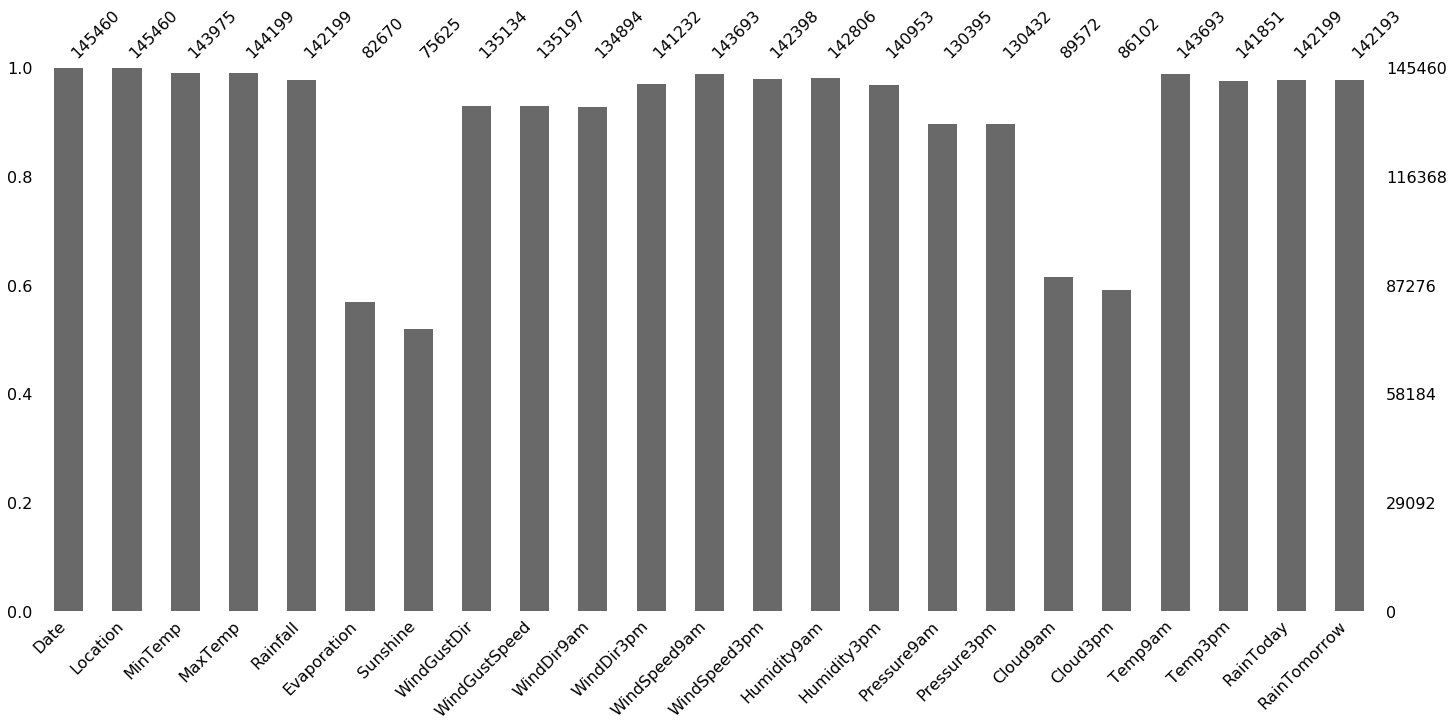

In [9]:
# plotting the number of rows with entries per column
msno.bar(rain_data)

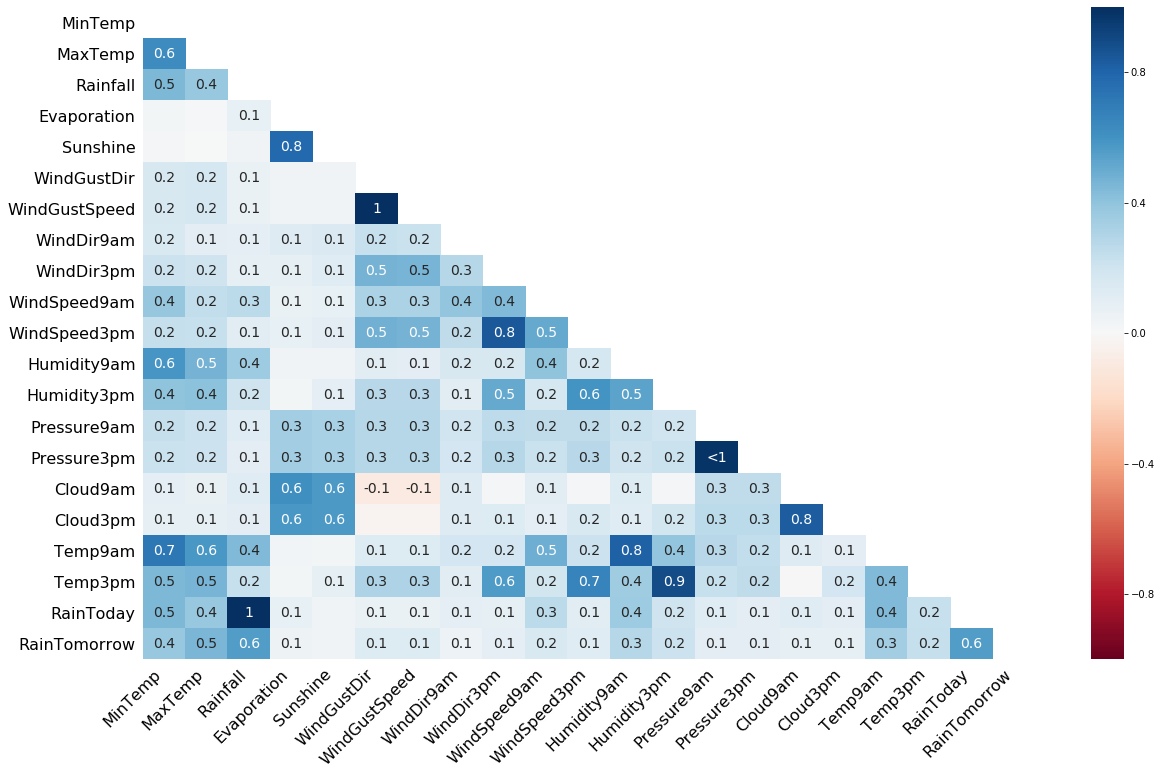

In [10]:
msno.heatmap(rain_data)

From the plot above and also the data printed out, there are columns with missing values. "Sunshine", "Evaporation", "Cloud9am", and "Cloud3am" in particular have a significant number of missing values. According to the definition of these columns, they seem to be important features.

You would observe that the target column (RainTomorrow) contains some missing values. We will drop row entries without targets. You would also observe that the correlation between RainToday and Rainfall is high, and that they both even have the same number of missing values. I'll keep both (no pressure), but drop rows with missing values. Later on, the missing values in other columns will be replaced.

In [11]:
# drop rows without targets, raintoday, and rainfall entries
rain_data_clean = rain_data.dropna(axis=0,how='any',subset=["RainTomorrow", "Rainfall", "RainToday"])


In [12]:
# checking the number of missing values we now have;
rain_data_clean.isnull().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

### Splitting the data into training and split sets

Lest we  fall victim to the silent killer called data leakage, let's split our data into training and test sets

In [13]:
# separating the target variables from the features
X = rain_data_clean.drop(columns = "RainTomorrow")
y = rain_data_clean.loc[:,"RainTomorrow"]
print ("The size of X is {}".format(X.shape))
print ("The size of y is {}".format(y.shape))

The size of X is (140787, 22)
The size of y is (140787,)


In [14]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [15]:
# splitting the dataset, and using the "stratify" argument to preserve the class ratio in the train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

<a class="anchor" id="4"></a>
# 4. **Feature Engineering**

[Table of Contents](#0.1)

### Replacing Dates with Seasons

According to [TripSavvy](https://www.tripsavvy.com/australian-seasons-1462601#:~:text=To%20break%20things%20down%20for%20you%2C%20each%20of,to%20August%2C%20and%20spring%20from%20September%20to%20November), Australia has four seasons categorised into months as follows:
<ol>
 <li> Summer : December - February </li>
 <li> Autumn : March - May </li>
 <li> Winter : June - August </li>
 <li> Spring : September - November </li>
</ol>
 
As such, we will replace the entries in the Date column with the corresponding season. This might help us get some insight as rainfall tends to be seasonal.

In [16]:
def season_replace(df):
    import datetime as dt
#     initialize empty list of monthsmonth 
    month = []
    for num in df['Date']:
#         get the year, month, day per entry
        date_obj = dt.datetime.strptime(num,"%Y-%m-%d")
#         get the month only
        date_mon = date_obj.month
#     add month to the series of months
        month.append(date_mon)
#     initialise the seasons and let their indexes correspond with the month of the year
#     i.e. Jan, Feb, Mar correspond to index 0, 1, 2 which are Summer, Summer, Autumn based on seasons
    season_options = ['Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring','Summer']
#     intialize empty list of seasons
    seasons= []
    for i in month:
#         add the season for each date entry to the seasons list
        seasons.append(season_options[i-1])
#     Drop the date column (it is the first column, index is 0)
    n = df.columns[0]
    df.drop(n, axis = 1, inplace = True)
#     add seasons to the dataframe
    df['Seasons'] = seasons
#     re-order the dataframe to start with the seasons column
    df = df[['Seasons'] +  [col for col in df.columns if col != 'Seasons']]
    return df

In [17]:
# replacing with the corresponding season
X_train = season_replace(X_train)

C:\Users\Wolemercy\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Wolemercy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
X_train.head()

,Seasons,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
9289,Winter,CoffsHarbour,9.1,23.3,0.0,2.6,8.4,NE,35.0,NNW,...,28.0,61.0,60.0,1021.1,1016.0,4.0,4.0,17.7,20.2,No
104246,Spring,Nuriootpa,8.3,31.7,0.0,6.8,13.2,W,41.0,NNE,...,17.0,43.0,6.0,1014.1,1009.5,0.0,1.0,21.9,30.9,No
76461,Autumn,Portland,1.2,16.9,0.0,2.0,9.0,E,35.0,ENE,...,17.0,79.0,55.0,1024.4,1019.1,NaN,2.0,11.1,16.4,No
124772,Spring,SalmonGums,7.6,15.3,1.2,NaN,NaN,S,54.0,S,...,28.0,60.0,58.0,NaN,NaN,NaN,NaN,11.9,12.9,Yes
74910,Autumn,Nhil,4.9,24.7,0.0,NaN,NaN,ESE,30.0,ESE,...,11.0,58.0,28.0,1022.3,1020.3,NaN,NaN,15.1,24.1,No


Next, we will encode the data using One Hot Encoder. First, we create a list of the categorical variables to encode, and numerical variables to standardize.

In [19]:
features = X_train.columns
features_to_encode = X_train.select_dtypes(include=['object', 'bool']).columns
features_to_scale = X_train.select_dtypes(include=['int64', 'float64']).columns

Next, we will create a transformer object through which we will pass the encoder, and scaler

In [20]:
# importing relevant packages

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.impute import SimpleImputer

In [21]:
# instantiate one hot encoder to use
encoder = OneHotEncoder(handle_unknown='error', drop='first', sparse='True')
# setting up categorical pipeline
cat_transformer = Pipeline(steps=[('onehot', encoder)])

In [22]:
# instantiate imputer and scalar for numeric variables
imputer = SimpleImputer(missing_values = np.nan, strategy="median")
scaler = RobustScaler()
# setting up the numerical pipeline
num_transformer = Pipeline(steps = [
    ('imputer', imputer),
    ('scaler', scaler)
])

In [23]:
# combining both the numerical and categorical pipeline into a ColumnTransformer instance
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, features_to_scale),
        ('cat', cat_transformer, features_to_encode)
    ],remainder='passthrough')

<a class="anchor" id="5"></a>
# 5. **Training the Model** 

[Table of Contents](#0.1)

We will be using a Random Forest Classifier model for this probem

In [24]:
# importing Random Forest Classifie
from sklearn.ensemble import RandomForestClassifier

# instantiating the classifier
rf_classifier = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=42,
                      max_features='auto')

Next we label encode the target variable as it is currently a catrgorical data type

In [25]:
# Encoding the dependent variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

Next, we train the model using the training dataset. The pipe object makes it easy to pass data through a series of processes that happene one after the other. Remember that the preprocessor object was defined for the imputing of missing values and standardization of out data while the rf_classifier is our chosen model.

In [26]:
pipe = make_pipeline(preprocessor, rf_classifier)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3...m',
       'Temp9am', 'Temp3pm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneH

<a class="anchor" id="6"></a>
# 6. **Evaluating the Model**

[Table of Contents](#0.1)

Let's see how well our does with predicting the target class for out test dataset.

Remember, that we are to take the test data through all the preprocessing and feature engineering processes our training set went through.

## Preprocessing the test data
First, we replace the dates with their corresponding season

In [27]:
# Replace Dates with season in test data
X_test = season_replace(X_test)
X_test.head()

C:\Users\Wolemercy\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Wolemercy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Seasons,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
100372,Autumn,MountGambier,7.4,14.5,1.6,1.0,6.4,SSE,35.0,S,...,24.0,82.0,62.0,1025.5,1023.2,5.0,2.0,10.4,13.2,Yes
109878,Winter,Albany,10.2,20.7,0.0,3.2,7.9,NaN,NaN,NNE,...,13.0,64.0,40.0,1025.1,1019.6,5.0,7.0,13.0,18.7,No
116043,Summer,PearceRAAF,14.2,31.9,0.0,NaN,12.5,WSW,44.0,SSE,...,31.0,47.0,31.0,1016.4,1014.4,4.0,0.0,22.7,29.0,No
123042,Autumn,Perth,13.6,24.9,0.0,3.6,1.3,NNE,20.0,NE,...,9.0,39.0,44.0,1019.8,1016.6,7.0,7.0,20.3,23.4,No
137059,Spring,AliceSprings,4.3,28.5,0.0,7.4,11.4,ESE,35.0,E,...,19.0,12.0,3.0,1023.7,1018.4,0.0,0.0,20.7,27.8,No


Next, we label the target test variable accordingly.

In [28]:
# Label encode y_test
y_test = le.transform(y_test)

Next, we predict our target classses

In [29]:
y_pred = pipe.predict(X_test)

## Evaluating the Classifier

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

import matplotlib.pyplot as plt

In [31]:
acc = accuracy_score(y_test, y_pred)

In [32]:
print("The accuracy of the model is {}%".format(round(acc * 100,3)))

The accuracy of the model is 84.836%


#### Probability Predictions

Next, let's see our ROC and AUC performance

In [33]:
train_probs = pipe.predict_proba(X_train)[:, 1]
test_probs = pipe.predict_proba(X_test)[:, 1]
train_pred = pipe.predict(X_train)

In [34]:
print("Train ROC AUC Score: {}".format(roc_auc_score(y_train,train_probs)))
print("Test ROC AUC Score: {}".format(roc_auc_score(y_test,test_probs)))

Train ROC AUC Score: 0.889103774756661
Test ROC AUC Score: 0.8728812312350955


To plot the ROC curve, let's define a function that takes in all the necessary arguments and returns the ROC Curve as well as the precision and recall metrics

In [35]:
def evaluate_model(y_pred, test_probs, train_pred, train_probs, y_train):
    
    baseline = {}
    baseline['recall'] = recall_score(y_test,
                        [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test,
                            [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, test_probs)
    
    train_results = {}
    train_results["recall"] = recall_score(y_train, train_pred)
    train_results['precision'] = precision_score(y_train, train_pred)
    train_results['roc'] = roc_auc_score(y_train, train_probs)

    for metric in ['recall', 'precision', 'roc']:
        print('{} \n Baseline: {} \n Test: {} \n Train: {}'.format(metric.capitalize(),round(baseline[metric], 2),round(results[metric], 2),round(train_results[metric], 2)))
              
#     calculate the  FPR and TPR
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, test_probs)
              
    plt.figure(figsize = (8,6))
    plt.rcParams['font.size'] = 16
    
#     Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label='baseline')
    plt.plot(model_fpr, model_tpr, 'r', label='model')
    plt.legend();
    
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate');
    plt.title('ROC Curves');
    plt.show()

Recall 
 Baseline: 1.0 
 Test: 0.44 
 Train: 0.43
Precision 
 Baseline: 0.22 
 Test: 0.78 
 Train: 0.81
Roc 
 Baseline: 0.5 
 Test: 0.87 
 Train: 0.89


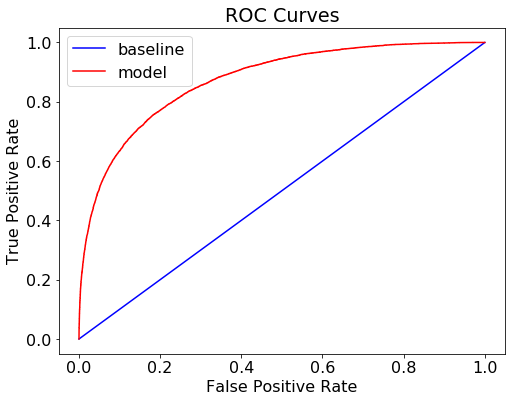

In [36]:
evaluate_model(y_pred, test_probs, train_pred, train_probs, y_train)

We can see that the recall, precision, and auc score for the train and test sets are pretty close to each other. This suggests it is unlikely that our model is being overfitted

#### Confusion Matrix

Next, let's plot a pretty confusion matrix for some more insight into our model performance

In [37]:
import itertools

def plot_confusion_matrix (cm, classes, normalize=False, title='Confusion Matrix', cmap = plt.cm.Blues):
    
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar (aspect = 4)
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size = 14)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
#     Label the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                fontsize=20,
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else "black")
        
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel ('True label', size = 18)
        plt.xlabel ('Predicted label', size = 18)

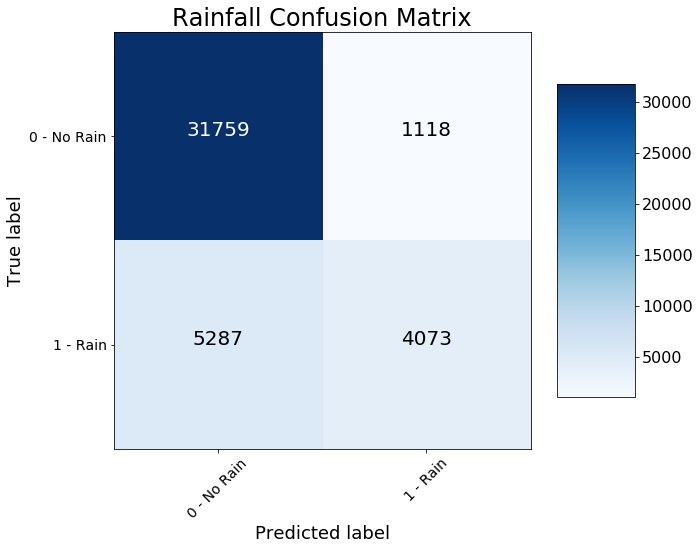

In [38]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['0 - No Rain', '1 - Rain'],
                     title = 'Rainfall Confusion Matrix')

From this, we can see that the model is not doing so well to correctly predict that it would rain the next day. In fact you can infer this from the low recall score we had (0.44 and 0.43 for the test and training sets respectively). The precision score, on the other hand was pretty high (0.78 and 0.81 for the test and training sets respectively.

This means that when our model predicts rainfall, it is more likely to rain than otherwise. However, we would also run issues, because there are a good number of cases where it predicts an absense of rainfall, and it actually rains. Having a low recall score in this case or a high number of false negatives is not desirable.

One reason why this is the case could be that the dataset is imbalanced, i.e. there are way more instances of the "No rain" class than the "Rain" class.

Let's attempt to use SMOTE to sample the dataset and improve our model's predictive performance

<a class="anchor" id="7"></a>
# 7. **Dealing with Class Imbalance**

[Table of Contents](#0.1)

Using SMOTE to remedy the class imbalance

In [39]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
# pipe = make_pipeline(preprocessor, rf_classifier)
# first we fit and transform the training data using the preprocessor transformer instance
# this ensures that the categorical variables are encoded before the sampling takes place
X_train_new = preprocessor.fit_transform(X_train)
X_train_new, y_train_new = sm.fit_resample(X_train_new, y_train)

Instantiating a new pipeline to train the resampled dataset

In [40]:
pipe_smote = make_pipeline(rf_classifier)
pipe_smote.fit(X_train_new, y_train_new)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=50, n_estimators=150,
                                        n_jobs=-1, oob_score=True,
                                        random_state=42))])

Next, we prepare the test dataset for prediction

In [41]:
X_test_new = preprocessor.fit_transform(X_test)

Next, we make predictions using the new model

In [42]:
y_pred_new = pipe_smote.predict(X_test_new)

Let's see our model acccuracy

In [43]:
acc_smote = accuracy_score(y_test, y_pred_new)
print("The accuracy of the smote_model is {}%".format(round(acc_smote * 100,3)))

The accuracy of the smote_model is 82.115%


Next, let's evaluate our model's recall, precison, and roc_auc_score

In [44]:
train_probs_new = pipe_smote.predict_proba(X_train_new)[:, 1]
test_probs_new = pipe_smote.predict_proba(X_test_new)[:, 1]
train_pred_new = pipe_smote.predict(X_train_new)

Recall 
 Baseline: 1.0 
 Test: 0.73 
 Train: 0.86
Precision 
 Baseline: 0.22 
 Test: 0.58 
 Train: 0.86
Roc 
 Baseline: 0.5 
 Test: 0.88 
 Train: 0.94


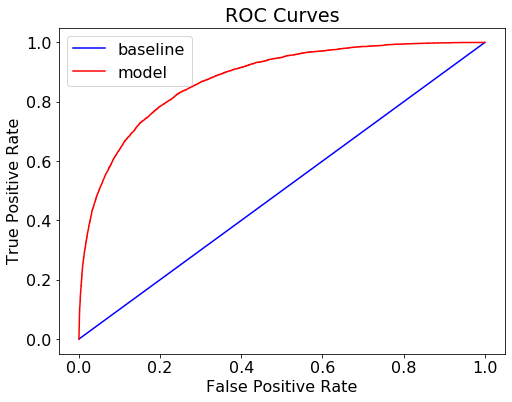

In [45]:
evaluate_model(y_pred_new, test_probs_new, train_pred_new, train_probs_new, y_train_new)

Next, let's see what our confusion matrix looks like

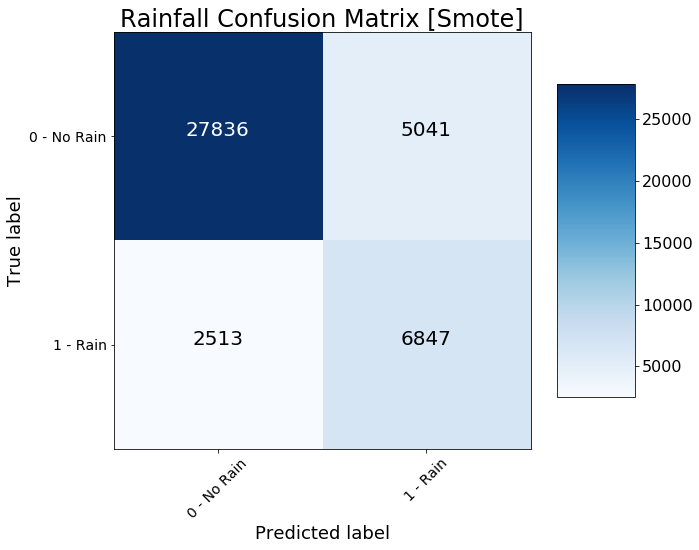

In [46]:
cm_smote = confusion_matrix(y_test, y_pred_new)
plot_confusion_matrix(cm_smote, classes=['0 - No Rain', '1 - Rain'],
                     title = 'Rainfall Confusion Matrix [Smote]')

We can observe some improvements to our model. The number of false negatives have reduced (so we can expect our recall score to improve). However, the number of false positives have also increased (so our precision has dropped). But that's fine. It is much better to be wrong about rain falling than about rain not falling. 

<a class="anchor" id="8"></a>
# **8. Tuning Hyperparameters**

[Table of Contents](#0.1)

In [47]:
# this package prints out data in a pretty format
from pprint import pprint

# let's see the current parameters in use
print('Parameters currently in useL\n')
pprint(rf_classifier.get_params())

Parameters currently in useL

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Next, create a grid of parameters for the model to randomly pick and train

In [48]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int (x) for x in np.linspace(start=100, stop=700,num=50)]

# number of features to consider at every split
max_features = ['auto', 'log2'] 

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# include None in max_depth
max_depth.append(None)

# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 4, 10]

# method of selecting samples for training each tree
bootstrap = [True]

max_leaf_nodes = [None] + list(np.linspace(10, 50, 500).astype(int))

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes,
               'bootstrap': bootstrap}

In [49]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1)

# creating a grid of hyperparameters
rf_random = RandomizedSearchCV(
                estimator = rf,
                param_distributions = random_grid,
                n_iter = 5, cv = 3,
                verbose=1, random_state=42,
                scoring='roc_auc')

# next, we define a pipeline instance that takes fits each model gotten from the grid search
# onto the training data
pipe_random = make_pipeline(rf_random)
pipe_random.fit(X_train_new, y_train_new)

# return the hyperparameters of the best model
rf_random.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'n_estimators': 577,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 46,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': True}

Next, we checj the average number of nodes and maximum depths in our best random forest classifier

In [50]:
best_model = rf_random.best_estimator_
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print ('Average number of nodes: {}'.format(int(np.mean(n_nodes))))
print ('Average maximum depth: {}'.format(int(np.mean(max_depths))))

Average number of nodes: 91
Average maximum depth: 13


Next, we evaluate the best model

In [51]:
pipe_best = make_pipeline(best_model)
pipe_best.fit(X_train_new, y_train_new)
y_pred_best = pipe_best.predict(X_test_new)

In [52]:
train_rf_probs_best = pipe_best.predict_proba(X_train_new)[:, 1]
test_rf_probs_best = pipe_best.predict_proba(X_test_new)[:, 1]
train_rf_pred_best = pipe_best.predict(X_train_new)

In [53]:
acc_best = accuracy_score(y_test, y_pred_best)
print("The accuracy of the smote_model is {}%".format(round(acc_best * 100,3)))

The accuracy of the smote_model is 79.307%


Recall 
 Baseline: 1.0 
 Test: 0.74 
 Train: 0.81
Precision 
 Baseline: 0.22 
 Test: 0.52 
 Train: 0.81
Roc 
 Baseline: 0.5 
 Test: 0.85 
 Train: 0.9


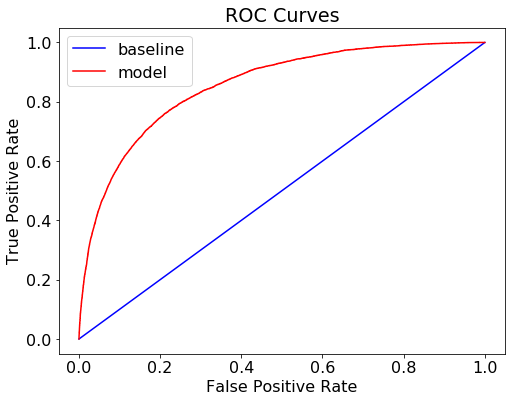

In [54]:
evaluate_model(y_pred_best, test_rf_probs_best, train_rf_pred_best, train_rf_probs_best, y_train_new)

And of course, the confusion matrix

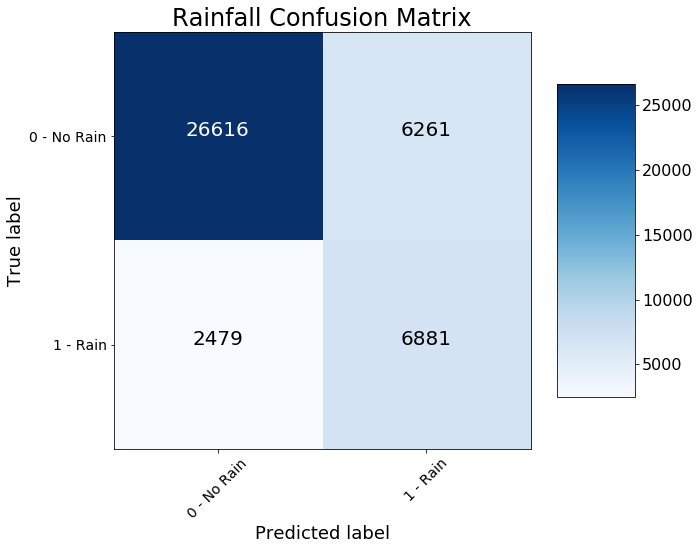

In [55]:
cm_best_model = confusion_matrix(y_test, y_pred_best)
plot_confusion_matrix(cm_best_model, classes=['0 - No Rain', '1 - Rain'],
                     title = 'Rainfall Confusion Matrix')

<a class="anchor" id="8"></a>
# **9. Conclusion** 

[Table of Contents](#0.1)

We have been able to make predictions on whether rain will fall in Australia the next day with an accuracy of 79%. Our recall score shows was optimized over the precision score because we'd rather have a situation where we were wrong to predict rainfall than one where we were wrong to predict no rainfall. 

Thank you.

Kindly upvote if you found it interesting or helpful. Also, I'd very much appreciate any comments and feedback!